A geographical approach to completion rates in France

In [349]:
import pandas as pd
data = pd.read_csv("H:\Downloads\moncompteformation_formations_engagees.csv",sep=";")
data.head()

,date_chargement,date validation,statut_dossier,type_referentiel,type_formation2,code_rs,code_rncp,domaine_formation_nsf,formacode_principal,libelle_formacode_principal,...,part_cec,Code Officiel Département,Code Officiel Région,Nom Officiel Département Majuscule,année de validation,code_certifinfo,intitule_certification,code_region_lieu_formation,code_postal_lieu_formation,Mois de validation
0,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5055,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Chariot automoteur,...,0,83,93.0,VAR,2023,106691.0,Certificat d'aptitude à conduire en sécurité (...,93,83140,1
1,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5054,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Chariot automoteur,...,0,16,75.0,CHARENTE,2023,106699.0,Certificat d'aptitude à conduire en sécurité (...,75,16440,1
2,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5054,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Chariot automoteur,...,0,13,93.0,BOUCHES DU RHONE,2023,106699.0,Certificat d'aptitude à conduire en sécurité (...,93,13340,1
3,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5060,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Chariot automoteur,...,0,38,84.0,ISERE,2023,106703.0,Certificat d'aptitude à conduire en sécurité (...,84,38150,1
4,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5060,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Chariot automoteur,...,0,42,84.0,LOIRE,2023,106703.0,Certificat d'aptitude à conduire en sécurité (...,84,42100,1


In [350]:
data.columns

Index(['date_chargement', 'date validation', 'statut_dossier',
       'type_referentiel', 'type_formation2', 'code_rs', 'code_rncp',
       'domaine_formation_nsf', 'formacode_principal',
       'libelle_formacode_principal', 'modalite_presence',
       'region_lieu_formation', 'departement_lieu_formation', 'nb_dossiers',
       'nb_titulaires', 'prix_moyen', 'nb_dossiers_a_duree_connue',
       'duree_moyenne', 'montant_engage', 'part_france_competences',
       'nb_dossiers_finances_par_titulaires', 'part_titulaire',
       'nb_dossiers_finances_par_etat', 'part_etat',
       'nb_dossiers_finances_par_pole_emploi', 'part_pole_emploi',
       'nb_dossiers_finances_par_regions', 'part_region',
       'nb_dossiers_finances_par_opco', 'part_opco',
       'nb_dossiers_finances_par_entreprises', 'part_entreprise',
       'nb_dossiers_finances_par_cec', 'part_cec', 'Code Officiel Département',
       'Code Officiel Région', 'Nom Officiel Département Majuscule',
       'année de validation',

In [351]:
data.rename(columns={"Nom Officiel Département Majuscule":"Departement","prix_moyen":"Average_price"},inplace=True)

Summarize the price of an average training session for different departments

In [352]:
pd.set_option("display.max_rows", None)  #to display all rows

#groupby for mean of price per department
avg_training_prix = data.groupby("Departement")["Average_price"].mean().reset_index() 

avg_training_prix

,Departement,Average_price
0,AIN,1264.48
1,AISNE,1167.64
2,ALLIER,1248.91
3,ALPES DE HAUTE PROVENCE,1277.15
4,ALPES MARITIMES,1445.17
5,ARDECHE,1213.86
6,ARDENNES,1122.68
7,ARIEGE,1178.21
8,AUBE,1282.30
9,AUDE,1119.78


The cost of the average training session for a sample of the original dataset (25%). Do it one with the query function, and once without it

In [353]:
sample_data = data.sample(frac =.25)
#groupby for mean of price per department (for sample)
avg_sample_prix = sample_data.groupby("Departement")["Average_price"].mean().reset_index() 
avg_sample_prix

,Departement,Average_price
0,AIN,1262.87
1,AISNE,1160.64
2,ALLIER,1233.22
3,ALPES DE HAUTE PROVENCE,1313.55
4,ALPES MARITIMES,1453.22
5,ARDECHE,1199.17
6,ARDENNES,1112.36
7,ARIEGE,1145.55
8,AUBE,1324.76
9,AUDE,1092.13


In [354]:
#with query function
query=data.query("Average_price>1000").sample(frac=0.25)
avg_sample_prix2=query.groupby("Departement")["Average_price"].mean().reset_index()
avg_sample_prix2

,Departement,Average_price
0,AIN,1938.90
1,AISNE,1972.25
2,ALLIER,1982.25
3,ALPES DE HAUTE PROVENCE,1967.52
4,ALPES MARITIMES,2018.83
5,ARDECHE,1947.19
6,ARDENNES,1956.79
7,ARIEGE,1866.81
8,AUBE,2052.37
9,AUDE,1774.35


The cost of the average training session for which the cost is above 1000 euros

In [355]:
avg_sample_prix[avg_sample_prix["Average_price"]>1000]

,Departement,Average_price
0,AIN,1262.87
1,AISNE,1160.64
2,ALLIER,1233.22
3,ALPES DE HAUTE PROVENCE,1313.55
4,ALPES MARITIMES,1453.22
5,ARDECHE,1199.17
6,ARDENNES,1112.36
7,ARIEGE,1145.55
8,AUBE,1324.76
9,AUDE,1092.13


The cost of the average training session for the top 20 most expensive training sessions

In [356]:
top20_exp = avg_sample_prix.sort_values("Average_price", ascending=False).head(20)
top20_exp

,Departement,Average_price
76,PARIS,1868.34
46,HAUTS DE SEINE,1685.24
57,LOIRE ATLANTIQUE,1640.89
33,GIRONDE,1621.07
62,MAINE ET LOIRE,1605.42
81,RHONE,1584.82
25,DOUBS,1584.33
16,CHARENTE MARITIME,1575.08
97,VIENNE,1572.34
43,HAUTE VIENNE,1551.14


The cost of the average training session for the dataset where intitule formation (intitule_certification) includes the word ”Yoga”

In [357]:
import numpy as np
#find indices where intitule_certification contains yoga 
index_yoga = np.where(data["intitule_certification"].str.contains("Yoga"))

#mean of the prix_moyen where intitule_certification contains yoga
yoga_mean=data["Average_price"].iloc[index_yoga].mean()
print("The average cost of training session that includes Yoga is",yoga_mean)


The average cost of training session that includes Yoga is 2043.53125


Replace all instances where the ”Yoga” pattern appear by ”Cours de yoga”

In [358]:
data["intitule_certification"].iloc[index_yoga]="Cours de yoga"
data[data["intitule_certification"]=="Cours de yoga"].head()

C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_17172\1930604302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["intitule_certification"].iloc[index_yoga]="Cours de yoga"


,date_chargement,date validation,statut_dossier,type_referentiel,type_formation2,code_rs,code_rncp,domaine_formation_nsf,formacode_principal,libelle_formacode_principal,...,part_cec,Code Officiel Département,Code Officiel Région,Departement,année de validation,code_certifinfo,intitule_certification,code_region_lieu_formation,code_postal_lieu_formation,Mois de validation
31087,2023-11-02,2020-10,Clos - Non Réalisé annulé OF,RS,NaN,5184,-1,"Enseignement, formation",15450.0,Yoga,...,0,75,11.0,PARIS,2020,108511.0,Cours de yoga,11,75004,10
31310,2023-11-02,2020-10,Clos - Réalisation Totale,RS,NaN,5184,-1,"Enseignement, formation",15450.0,Yoga,...,0,75,11.0,PARIS,2020,108511.0,Cours de yoga,11,75004,10
41953,2023-11-02,2021-11,Clos - Réalisation Totale,RS,NaN,5184,-1,"Enseignement, formation",15450.0,Yoga,...,0,28,24.0,EURE ET LOIR,2021,108511.0,Cours de yoga,24,28100,11
75818,2023-11-02,2020-09,Clos - Non Réalisé annulé OF,RS,NaN,5184,-1,"Enseignement, formation",15450.0,Yoga,...,0,75,11.0,PARIS,2020,108511.0,Cours de yoga,11,75004,9
84453,2023-11-02,2021-11,Clos - Réalisation Totale,RS,NaN,5184,-1,"Enseignement, formation",15450.0,Yoga,...,0,75,11.0,PARIS,2021,108511.0,Cours de yoga,11,75004,11


The cost of the average training session for the subset of the dataset where intitule formation beginning with the word "Certificat"

In [359]:
certificat = data[data["intitule_certification"].str.startswith("Certificat")] 
certi_mean=certificat["Average_price"].mean() 
print("The average cost of training session where 'intitule_certification' begins with 'Certificat' is",certi_mean)

The average cost of training session where 'intitule_certification' begins with 'Certificat' is 1086.6785876033287


The cost of the average training session for n the subset of the dataset where intitule formation ending with the word ”compétences”

In [360]:
compétences = data[data["intitule_certification"].str.endswith("compétences")] 
comp_mean=compétences["Average_price"].mean()
print("The average cost of training session where 'intitule_certification' ends with 'compétences' is",comp_mean)

The average cost of training session where 'intitule_certification' ends with 'compétences' is 1697.6584299398787


 For the latest subset, in addition to the average cost, plot a distribution of the cost through a
histogram

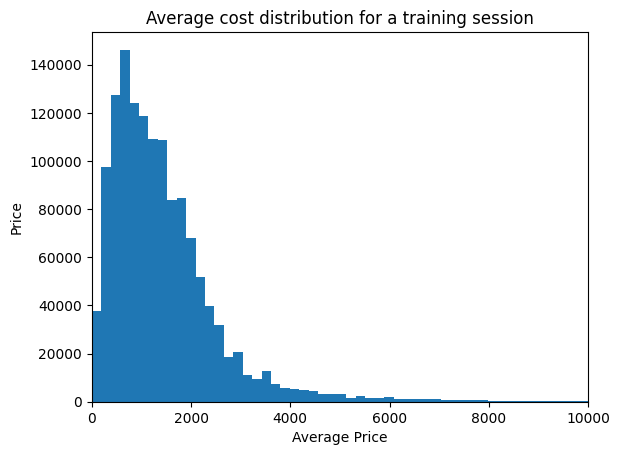

In [361]:
import matplotlib.pyplot as plt 

plt.hist(data["Average_price"],bins=300)
plt.xlabel("Average Price")
plt.ylabel("Price")
plt.title("Average cost distribution for a training session")
plt.xlim(0,10000) 

plt.show()

Using pandas on a real life dataset

In [362]:
data.shape

(1361934, 43)

In [363]:
data.drop_duplicates().shape  #Screen the dataset for duplicates

(1361934, 43)

Create a new variable by multiplying nb dossiers with average cost, and assess to what extent this new variable matches montant engage


In [364]:
data["Total_cost"] = data["nb_dossiers"]*data["Average_price"]
compare=((data["Total_cost"]==data["montant_engage"])==True).sum()
print("Extent (no. of columns) the 'Total cost' matches 'montant engage' is",compare)

Extent (no. of columns) the 'Total cost' matches 'montant engage' is 1121742


Create a table where you compute the cumulative sum of montant engage for all departments, using groupby, and then subset this table so that you have only the departement of Paris

In [365]:
#Groupby and then subset for PARIS 
cumsum=data.groupby("Departement")["montant_engage"].sum().reset_index()
cumsum[cumsum["Departement"]=="PARIS"]

,Departement,montant_engage
76,PARIS,556293678


In [366]:
#Subset for Paris and then groupby
paris = data[data["Departement"]=='PARIS']
paris.groupby("Departement")["montant_engage"].sum().reset_index() 

,Departement,montant_engage
0,PARIS,556293678


 Perfom a value count of the number of training sessions per region in 2022

In [367]:
train_reg = data['region_lieu_formation'].value_counts(sort=True).reset_index()

train_reg.rename(columns={'count':'training sessions in each region'}, inplace=True)
train_reg

,region_lieu_formation,training sessions in each region
0,Île-de-France,243296
1,NC,184274
2,Auvergne-Rhône-Alpes,147579
3,Occitanie,110660
4,Nouvelle-Aquitaine,106435
5,Provence-Alpes-Côte d'Azur,102822
6,Hauts-de-France,87648
7,Grand Est,85863
8,Pays de la Loire,71473
9,Bretagne,57033


Merge both datasets (train reg and regions) to create an intermediate where the number of row corresponds to the
number of distinct regions.

In [368]:
regions = pd.read_excel("H:\\Downloads\\fr_population.region.departement.xls")   # population size of the Region
regions

,Evolution de la population par région,Recensement 1990,Recensement 1999,1er janvier 2008,1er janvier 2023 (p)
0,Auvergne-Rhône-Alpes,6668168,6949608,7459092,8197325
1,Bourgogne-Franche-Comté,2705826,2728086,2802519,2786296
2,Bretagne,2794317,2904075,3149701,3429882
3,Centre-Val de Loire,2369808,2440295,2531588,2572278
4,Corse,249645,260152,302966,351255
5,Grand Est,5274064,5387509,5521452,5562262
6,Hauts-de-France,5770671,5855448,5931091,5980697
7,Île-de-France,10644665,10946012,11659260,12358932
8,Normandie,3126859,3202449,3293092,3317023
9,Nouvelle-Aquitaine,5114287,5257954,5671076,6110365


In [369]:
#merge the two data sets
merge_reg = pd.merge( regions, train_reg,  how="outer",left_on="Evolution de la population par région",right_on="region_lieu_formation")
merge_reg=merge_reg.set_index("region_lieu_formation").reset_index()
merge_reg


,region_lieu_formation,Evolution de la population par région,Recensement 1990,Recensement 1999,1er janvier 2008,1er janvier 2023 (p),training sessions in each region
0,Auvergne-Rhône-Alpes,Auvergne-Rhône-Alpes,6.67e+06,6.95e+06,7.46e+06,8.20e+06,147579.0
1,Bourgogne-Franche-Comté,Bourgogne-Franche-Comté,2.71e+06,2.73e+06,2.80e+06,2.79e+06,40761.0
2,Bretagne,Bretagne,2.79e+06,2.90e+06,3.15e+06,3.43e+06,57033.0
3,Centre-Val de Loire,Centre-Val de Loire,2.37e+06,2.44e+06,2.53e+06,2.57e+06,38851.0
4,Corse,Corse,2.50e+05,2.60e+05,3.03e+05,3.51e+05,4727.0
5,Grand Est,Grand Est,5.27e+06,5.39e+06,5.52e+06,5.56e+06,85863.0
6,Hauts-de-France,Hauts-de-France,5.77e+06,5.86e+06,5.93e+06,5.98e+06,87648.0
7,Île-de-France,Île-de-France,1.06e+07,1.09e+07,1.17e+07,1.24e+07,243296.0
8,Normandie,Normandie,3.13e+06,3.20e+06,3.29e+06,3.32e+06,54433.0
9,Nouvelle-Aquitaine,Nouvelle-Aquitaine,5.11e+06,5.26e+06,5.67e+06,6.11e+06,106435.0


Specify which type of merge you did and explain why you used this
one.

 Based on this new dataset, compute for each region the % of training sessions per habitant

In [370]:
merge_reg["% training per habitant"] = merge_reg["training sessions in each region"] / merge_reg["1er janvier 2023 (p)"]
merge_reg

,region_lieu_formation,Evolution de la population par région,Recensement 1990,Recensement 1999,1er janvier 2008,1er janvier 2023 (p),training sessions in each region,% training per habitant
0,Auvergne-Rhône-Alpes,Auvergne-Rhône-Alpes,6.67e+06,6.95e+06,7.46e+06,8.20e+06,147579.0,0.02
1,Bourgogne-Franche-Comté,Bourgogne-Franche-Comté,2.71e+06,2.73e+06,2.80e+06,2.79e+06,40761.0,0.01
2,Bretagne,Bretagne,2.79e+06,2.90e+06,3.15e+06,3.43e+06,57033.0,0.02
3,Centre-Val de Loire,Centre-Val de Loire,2.37e+06,2.44e+06,2.53e+06,2.57e+06,38851.0,0.02
4,Corse,Corse,2.50e+05,2.60e+05,3.03e+05,3.51e+05,4727.0,0.01
5,Grand Est,Grand Est,5.27e+06,5.39e+06,5.52e+06,5.56e+06,85863.0,0.02
6,Hauts-de-France,Hauts-de-France,5.77e+06,5.86e+06,5.93e+06,5.98e+06,87648.0,0.01
7,Île-de-France,Île-de-France,1.06e+07,1.09e+07,1.17e+07,1.24e+07,243296.0,0.02
8,Normandie,Normandie,3.13e+06,3.20e+06,3.29e+06,3.32e+06,54433.0,0.02
9,Nouvelle-Aquitaine,Nouvelle-Aquitaine,5.11e+06,5.26e+06,5.67e+06,6.11e+06,106435.0,0.02


Go back to the original dataset ”Fondations engagées”. Remove data where status dossier is
not ”Clos”

In [371]:
data.head()
data.groupby("statut_dossier")["statut_dossier"].count()

statut_dossier
Clos - Non Réalisé annulé OF           141461
Clos - Non Réalisé annulé titulaire    144418
Clos - Réalisation Partielle           115214
Clos - Réalisation Totale              800134
Dossier annulé gestionnaire               151
Entrée en formation                     96893
Rejeté                                     51
Sortie de formation                     15420
Validé                                  48192
Name: statut_dossier, dtype: int64

In [372]:
clos=data[data["statut_dossier"].str.contains("Clos")==True]  #df where statut_dossier is closed ('clos')
clos.head()

,date_chargement,date validation,statut_dossier,type_referentiel,type_formation2,code_rs,code_rncp,domaine_formation_nsf,formacode_principal,libelle_formacode_principal,...,Code Officiel Département,Code Officiel Région,Departement,année de validation,code_certifinfo,intitule_certification,code_region_lieu_formation,code_postal_lieu_formation,Mois de validation,Total_cost
0,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5055,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Chariot automoteur,...,83,93.0,VAR,2023,106691.0,Certificat d'aptitude à conduire en sécurité (...,93,83140,1,590
1,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5054,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Chariot automoteur,...,16,75.0,CHARENTE,2023,106699.0,Certificat d'aptitude à conduire en sécurité (...,75,16440,1,4780
2,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5054,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Chariot automoteur,...,13,93.0,BOUCHES DU RHONE,2023,106699.0,Certificat d'aptitude à conduire en sécurité (...,93,13340,1,1446
3,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5060,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Chariot automoteur,...,38,84.0,ISERE,2023,106703.0,Certificat d'aptitude à conduire en sécurité (...,84,38150,1,2616
4,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5060,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Chariot automoteur,...,42,84.0,LOIRE,2023,106703.0,Certificat d'aptitude à conduire en sécurité (...,84,42100,1,1320


Why is it useful if we want to compute a completion rate?

Develop a strategy to have the % of ”Réalisation totale” (with regards to the 4 types of ”dossiers” that are closed), according to the department. Provide a justification

In [373]:
clos.groupby("statut_dossier")["statut_dossier"].count()

statut_dossier
Clos - Non Réalisé annulé OF           141461
Clos - Non Réalisé annulé titulaire    144418
Clos - Réalisation Partielle           115214
Clos - Réalisation Totale              800134
Name: statut_dossier, dtype: int64

In [374]:
clos=clos[["Departement","statut_dossier"]]     #focusing only on departement and statut_dossier
clos.head()

,Departement,statut_dossier
0,VAR,Clos - Réalisation Totale
1,CHARENTE,Clos - Réalisation Totale
2,BOUCHES DU RHONE,Clos - Réalisation Totale
3,ISERE,Clos - Réalisation Totale
4,LOIRE,Clos - Réalisation Totale


In [375]:
totale=clos[clos["statut_dossier"]=="Clos - Réalisation Totale"]   #Only for Clos-Réalisation Totale

Réalisation_Totale=totale.groupby("Departement")["statut_dossier"].count().reset_index()  #count for Clos-Réalisation Totale for each departements
Réalisation_Totale.rename(columns={"statut_dossier":"Réalisation Totale"},inplace=True)
Réalisation_Totale.head()


,Departement,Réalisation Totale
0,AIN,5269
1,AISNE,3783
2,ALLIER,3122
3,ALPES DE HAUTE PROVENCE,1893
4,ALPES MARITIMES,14063


In [376]:
Clos=clos.groupby("Departement")["statut_dossier"].count().reset_index() #counts for all Clos for each department
Clos.rename(columns={"statut_dossier":"Clos"},inplace=True)
Clos.head()

,Departement,Clos
0,AIN,7201
1,AISNE,5853
2,ALLIER,4407
3,ALPES DE HAUTE PROVENCE,2616
4,ALPES MARITIMES,20623


In [377]:
Stat_dossier=(pd.merge(Clos,Réalisation_Totale,on="Departement")).reset_index()
Stat_dossier.head()

,index,Departement,Clos,Réalisation Totale
0,0,AIN,7201,5269
1,1,AISNE,5853,3783
2,2,ALLIER,4407,3122
3,3,ALPES DE HAUTE PROVENCE,2616,1893
4,4,ALPES MARITIMES,20623,14063


In [378]:
Stat_dossier["% Réalisation totale"]=(Stat_dossier["Réalisation Totale"]/Stat_dossier["Clos"])*100
Stat_dossier.head()

,index,Departement,Clos,Réalisation Totale,% Réalisation totale
0,0,AIN,7201,5269,73.17
1,1,AISNE,5853,3783,64.63
2,2,ALLIER,4407,3122,70.84
3,3,ALPES DE HAUTE PROVENCE,2616,1893,72.36
4,4,ALPES MARITIMES,20623,14063,68.19


Extra pandas exercises

2.1 Lambda and functions

In [379]:
data.head()

,date_chargement,date validation,statut_dossier,type_referentiel,type_formation2,code_rs,code_rncp,domaine_formation_nsf,formacode_principal,libelle_formacode_principal,...,Code Officiel Département,Code Officiel Région,Departement,année de validation,code_certifinfo,intitule_certification,code_region_lieu_formation,code_postal_lieu_formation,Mois de validation,Total_cost
0,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5055,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Chariot automoteur,...,83,93.0,VAR,2023,106691.0,Certificat d'aptitude à conduire en sécurité (...,93,83140,1,590
1,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5054,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Chariot automoteur,...,16,75.0,CHARENTE,2023,106699.0,Certificat d'aptitude à conduire en sécurité (...,75,16440,1,4780
2,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5054,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Chariot automoteur,...,13,93.0,BOUCHES DU RHONE,2023,106699.0,Certificat d'aptitude à conduire en sécurité (...,93,13340,1,1446
3,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5060,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Chariot automoteur,...,38,84.0,ISERE,2023,106703.0,Certificat d'aptitude à conduire en sécurité (...,84,38150,1,2616
4,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5060,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Chariot automoteur,...,42,84.0,LOIRE,2023,106703.0,Certificat d'aptitude à conduire en sécurité (...,84,42100,1,1320


In [380]:
data[data["Departement"]=="PARIS"].head()

,date_chargement,date validation,statut_dossier,type_referentiel,type_formation2,code_rs,code_rncp,domaine_formation_nsf,formacode_principal,libelle_formacode_principal,...,Code Officiel Département,Code Officiel Région,Departement,année de validation,code_certifinfo,intitule_certification,code_region_lieu_formation,code_postal_lieu_formation,Mois de validation,Total_cost
15,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5436,-1,"Informatique, traitement de l'information, rés...",NaN,Logiciel Excel|Bureautique,...,75,11.0,PARIS,2023,111235.0,Certification bureautique Excel,11,75008,1,2412
23,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,6151,-1,"Langues vivantes, civilisations étrangères et ...",NaN,Langues|Anglais|Anglais commercial,...,75,11.0,PARIS,2023,112588.0,Test TOEIC (Test of English for International ...,11,75016,1,3360
27,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5635,-1,"Transports, manutention, magasinage",31801.0,Conduite taxi,...,75,11.0,PARIS,2023,112663.0,Habilitation pour l'accès à la profession de c...,11,75018,1,1821
40,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5788,-1,NC,NaN,Logiciel Autocad|DAO,...,75,11.0,PARIS,2023,112865.0,Tosa AutoCAD,11,75009,1,4320
51,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,6166,-1,"Informatique, traitement de l'information, rés...",NaN,Logiciel Dreamweaver|Logiciel WordPress|Site i...,...,75,11.0,PARIS,2023,114194.0,ICDL - Édition de sites web,11,75011,1,1800


In [381]:
data["Departement"]=data["Departement"].apply(lambda a: str(a).replace("PARIS","CAPITALE"))
data.head(25)

,date_chargement,date validation,statut_dossier,type_referentiel,type_formation2,code_rs,code_rncp,domaine_formation_nsf,formacode_principal,libelle_formacode_principal,...,Code Officiel Département,Code Officiel Région,Departement,année de validation,code_certifinfo,intitule_certification,code_region_lieu_formation,code_postal_lieu_formation,Mois de validation,Total_cost
0,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5055,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Chariot automoteur,...,83,93.0,VAR,2023,106691.0,Certificat d'aptitude à conduire en sécurité (...,93,83140,1,590
1,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5054,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Chariot automoteur,...,16,75.0,CHARENTE,2023,106699.0,Certificat d'aptitude à conduire en sécurité (...,75,16440,1,4780
2,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5054,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Chariot automoteur,...,13,93.0,BOUCHES DU RHONE,2023,106699.0,Certificat d'aptitude à conduire en sécurité (...,93,13340,1,1446
3,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5060,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Chariot automoteur,...,38,84.0,ISERE,2023,106703.0,Certificat d'aptitude à conduire en sécurité (...,84,38150,1,2616
4,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5060,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Chariot automoteur,...,42,84.0,LOIRE,2023,106703.0,Certificat d'aptitude à conduire en sécurité (...,84,42100,1,1320
5,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5118,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Grue auxiliaire,...,71,27.0,SAONE ET LOIRE,2023,106709.0,Certificat d'aptitude à conduire en sécurité (...,27,71100,1,1358
6,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5106,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Pont roulant,...,37,24.0,INDRE ET LOIRE,2023,106713.0,Certificat d'aptitude à conduire en sécurité (...,24,37250,1,928
7,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5106,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Pont roulant,...,76,28.0,SEINE MARITIME,2023,106713.0,Certificat d'aptitude à conduire en sécurité (...,28,76140,1,600
8,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5111,-1,"Transports, manutention, magasinage",NaN,Sécurité manutention|Chariot automoteur,...,85,52.0,VENDEE,2023,106719.0,Certificat d'aptitude à conduire en sécurité (...,52,85150,1,540
9,2023-11-02,2023-01,Clos - Réalisation Totale,RS,NaN,5033,-1,"Transports, manutention, magasinage",31862.0,Télé-pilotage drone,...,33,75.0,GIRONDE,2023,107145.0,Piloter un drone dans le secteur du BTP et du ...,75,33850,1,4499


2.2 Pandas options

In [382]:
#pd.reset_option('display.precision',0)

In [383]:
pd.set_option("display.precision", 1)  #set to 1 decimal points
Stat_dossier.head()

,index,Departement,Clos,Réalisation Totale,% Réalisation totale
0,0,AIN,7201,5269,73.2
1,1,AISNE,5853,3783,64.6
2,2,ALLIER,4407,3122,70.8
3,3,ALPES DE HAUTE PROVENCE,2616,1893,72.4
4,4,ALPES MARITIMES,20623,14063,68.2


In [384]:
pd.set_option("display.precision", 2)  #set to 2 decimal points
Stat_dossier.head()

,index,Departement,Clos,Réalisation Totale,% Réalisation totale
0,0,AIN,7201,5269,73.17
1,1,AISNE,5853,3783,64.63
2,2,ALLIER,4407,3122,70.84
3,3,ALPES DE HAUTE PROVENCE,2616,1893,72.36
4,4,ALPES MARITIMES,20623,14063,68.19


2.3 select dtypes

In [385]:
data.select_dtypes(include=['datetime64']).columns

Index([], dtype='object')

In [386]:
data["année de validation"].head()

0    2023
1    2023
2    2023
3    2023
4    2023
Name: année de validation, dtype: int64

In [387]:
data["année de validation"] = pd.to_datetime(data["année de validation"],format='%Y')
data["année de validation"].head()

0   2023-01-01
1   2023-01-01
2   2023-01-01
3   2023-01-01
4   2023-01-01
Name: année de validation, dtype: datetime64[ns]

In [388]:
data.select_dtypes(include=['datetime64']).columns

Index(['année de validation'], dtype='object')

2.4 clip

In [389]:
col=np.random.randint(10,51,15)
print(col)
clip=np.clip(col,20,30)
print(clip)
df=pd.DataFrame({"col":col,"clip":clip})
df



[45 26 38 39 18 15 17 39 46 23 28 46 28 11 26]
[30 26 30 30 20 20 20 30 30 23 28 30 28 20 26]


,col,clip
0,45,30
1,26,26
2,38,30
3,39,30
4,18,20
5,15,20
6,17,20
7,39,30
8,46,30
9,23,23


2.5 between time

In [390]:
range=pd.date_range("00:00:00","23:59:59",freq="10MIN")

series=pd.DataFrame({"Events":np.random.randint(1,10,144)},index=range)
series.head()

,Events
2023-12-22 00:00:00,3
2023-12-22 00:10:00,8
2023-12-22 00:20:00,6
2023-12-22 00:30:00,1
2023-12-22 00:40:00,4


In [391]:
betweentime=series.between_time("09:40:00","12:20:00")
betweentime.head(10)

,Events
2023-12-22 09:40:00,9
2023-12-22 09:50:00,2
2023-12-22 10:00:00,3
2023-12-22 10:10:00,1
2023-12-22 10:20:00,1
2023-12-22 10:30:00,5
2023-12-22 10:40:00,3
2023-12-22 10:50:00,3
2023-12-22 11:00:00,8
2023-12-22 11:10:00,7


2.6 time, missing values

2.6.1 Focus on the following variables : ”Suburb”, ”Date”, ”Type”, ”Regionname”, ”Distance”, ”Price”

In [392]:
melb=pd.read_csv("H:\Downloads\melb_house.csv",usecols=["suburb","date","type","region_name","distance","price"])

melb.head(10)

,suburb,type,price,date,distance,region_name
0,Abbotsford,h,NaN,2016-09-03,2.5,Northern Metropolitan
1,Abbotsford,h,1.48e+06,2016-12-03,2.5,Northern Metropolitan
2,Abbotsford,h,1.04e+06,2016-02-04,2.5,Northern Metropolitan
3,Abbotsford,u,NaN,2016-02-04,2.5,Northern Metropolitan
4,Abbotsford,h,1.46e+06,2017-03-04,2.5,Northern Metropolitan
5,Abbotsford,h,8.50e+05,2017-03-04,2.5,Northern Metropolitan
6,Abbotsford,h,1.60e+06,2016-06-04,2.5,Northern Metropolitan
7,Abbotsford,h,NaN,2016-08-06,2.5,Northern Metropolitan
8,Abbotsford,h,NaN,2016-08-06,2.5,Northern Metropolitan
9,Abbotsford,h,NaN,2016-08-06,2.5,Northern Metropolitan


2.6.2 Count the number of missing values per column

In [393]:
melb.isna().sum()

suburb            0
type              0
price          7610
date              0
distance          1
region_name       3
dtype: int64

2.6.3 Drop the missing values

In [394]:
melb=melb.dropna()
melb.head(10)

,suburb,type,price,date,distance,region_name
1,Abbotsford,h,1.48e+06,2016-12-03,2.5,Northern Metropolitan
2,Abbotsford,h,1.04e+06,2016-02-04,2.5,Northern Metropolitan
4,Abbotsford,h,1.46e+06,2017-03-04,2.5,Northern Metropolitan
5,Abbotsford,h,8.50e+05,2017-03-04,2.5,Northern Metropolitan
6,Abbotsford,h,1.60e+06,2016-06-04,2.5,Northern Metropolitan
10,Abbotsford,h,9.41e+05,2016-05-07,2.5,Northern Metropolitan
11,Abbotsford,h,1.88e+06,2016-05-07,2.5,Northern Metropolitan
14,Abbotsford,h,1.64e+06,2016-10-08,2.5,Northern Metropolitan
15,Abbotsford,h,1.00e+06,2016-10-08,2.5,Northern Metropolitan
16,Abbotsford,t,7.45e+05,2016-10-08,2.5,Northern Metropolitan


In [395]:
melb.isna().sum()

suburb         0
type           0
price          0
date           0
distance       0
region_name    0
dtype: int64

2.6.4 Create a column that shows the price in millions

In [396]:
million=melb["price"]/(10**6)
million.reset_index().head()

,index,price
0,1,1.48
1,2,1.03
2,4,1.47
3,5,0.85
4,6,1.60


2.6.5 The new column is added at the end of the data frame using insert

In [397]:
melb.insert(3,"price in millions",million)
melb.head()

,suburb,type,price,price in millions,date,distance,region_name
1,Abbotsford,h,1.48e+06,1.48,2016-12-03,2.5,Northern Metropolitan
2,Abbotsford,h,1.04e+06,1.03,2016-02-04,2.5,Northern Metropolitan
4,Abbotsford,h,1.46e+06,1.47,2017-03-04,2.5,Northern Metropolitan
5,Abbotsford,h,8.50e+05,0.85,2017-03-04,2.5,Northern Metropolitan
6,Abbotsford,h,1.60e+06,1.60,2016-06-04,2.5,Northern Metropolitan


2.6.6 Encode categorical (of variable ”type”)


In [398]:
melb.dtypes

suburb                object
type                  object
price                float64
price in millions    float64
date                  object
distance             float64
region_name           object
dtype: object

2.6.7 Count the number of unique Region names

In [399]:
melb.groupby("region_name")["region_name"].count()

region_name
Eastern Metropolitan          3272
Eastern Victoria               166
Northern Metropolitan         7864
Northern Victoria              166
South-Eastern Metropolitan    1341
Southern Metropolitan         8524
Western Metropolitan          5815
Western Victoria                96
Name: region_name, dtype: int64

2.6.8 Extract the year and month from the date

In [400]:
melb["Year"]=melb["date"].apply(lambda a: a[:-6])
melb["Month"]=melb["date"].apply(lambda a: a[5:-3])

melb.head()

,suburb,type,price,price in millions,date,distance,region_name,Year,Month
1,Abbotsford,h,1.48e+06,1.48,2016-12-03,2.5,Northern Metropolitan,2016,12
2,Abbotsford,h,1.04e+06,1.03,2016-02-04,2.5,Northern Metropolitan,2016,02
4,Abbotsford,h,1.46e+06,1.47,2017-03-04,2.5,Northern Metropolitan,2017,03
5,Abbotsford,h,8.50e+05,0.85,2017-03-04,2.5,Northern Metropolitan,2017,03
6,Abbotsford,h,1.60e+06,1.60,2016-06-04,2.5,Northern Metropolitan,2016,06


In [401]:
melb[["yyyy","mm","dd"]]=melb["date"].str.split("-",expand=True)
melb.head()

,suburb,type,price,price in millions,date,distance,region_name,Year,Month,yyyy,mm,dd
1,Abbotsford,h,1.48e+06,1.48,2016-12-03,2.5,Northern Metropolitan,2016,12,2016,12,03
2,Abbotsford,h,1.04e+06,1.03,2016-02-04,2.5,Northern Metropolitan,2016,02,2016,02,04
4,Abbotsford,h,1.46e+06,1.47,2017-03-04,2.5,Northern Metropolitan,2017,03,2017,03,04
5,Abbotsford,h,8.50e+05,0.85,2017-03-04,2.5,Northern Metropolitan,2017,03,2017,03,04
6,Abbotsford,h,1.60e+06,1.60,2016-06-04,2.5,Northern Metropolitan,2016,06,2016,06,04


2.6.9 Use the rank function to provide a ranking of the prices

In [402]:
price_rank=melb.rank().reset_index()
price_rank["price"].head()

0    22479.0
1    16985.0
2    22371.0
3    13061.5
4    23319.5
Name: price, dtype: float64

2.6.10 Sort values according to this ranking

In [403]:
price_rank.sort_values("price").head()

,index,suburb,type,price,price in millions,date,distance,region_name,Year,Month,yyyy,mm,dd
3371,4378,10609.5,24290.5,1.0,1.0,4166.5,6739.5,24241.0,4027.5,17620.0,4027.5,17620.0,1552.0
23202,29669,15725.0,24290.5,2.0,2.0,23883.0,10307.5,17071.5,25408.0,324.5,25408.0,324.5,4034.5
13624,17529,8769.5,24290.5,3.0,3.0,13701.5,124.5,7370.5,15813.0,12507.5,15813.0,12507.5,6070.0
2368,3063,6394.5,9235.5,4.0,4.0,8373.0,11346.0,17071.5,15813.0,1682.0,15813.0,1682.0,22242.0
2532,3290,7214.0,9235.5,5.5,5.5,1747.5,9137.0,7370.5,4027.5,10116.0,4027.5,10116.0,3126.5


2.7 Rolling window

In [404]:
apple=pd.read_csv("H:\Downloads\\apple.csv")
apple.head(10)

,date,close,volume,open,high,low
0,16:00,192.23,46541444,191.72,197.18,191.45
1,13/11/2018,192.23,46725710,191.63,197.18,191.45
2,12/11/2018,194.17,50991030,199.00,199.85,193.79
3,09/11/2018,204.47,34317760,205.55,206.01,202.25
4,08/11/2018,208.49,25289270,209.98,210.12,206.75
5,07/11/2018,209.95,33291640,205.97,210.06,204.13
6,06/11/2018,203.77,31774720,201.92,204.72,201.69
7,05/11/2018,201.59,66072170,204.30,204.39,198.17
8,02/11/2018,207.48,91046560,209.55,213.65,205.43
9,01/11/2018,222.22,52954070,219.05,222.36,216.81


In [405]:
rolling3=apple.iloc[:,1:].rolling(3).mean()
rolling3.head(10)

,close,volume,open,high,low
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,192.88,4.81e+07,194.12,198.07,192.23
3,196.96,4.40e+07,198.73,201.01,195.83
4,202.38,3.69e+07,204.84,205.33,200.93
5,207.64,3.10e+07,207.17,208.73,204.38
6,207.40,3.01e+07,205.96,208.30,204.19
7,205.10,4.37e+07,204.06,206.39,201.33
8,204.28,6.30e+07,205.26,207.59,201.76
9,210.43,7.00e+07,210.97,213.47,206.80


In [406]:
rolling5=apple.iloc[:,1:].rolling(5).mean()
rolling5.head(10)

,close,volume,open,high,low
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,198.32,4.08e+07,199.58,202.07,197.14
5,201.86,3.81e+07,202.43,204.64,199.67
6,204.17,3.51e+07,204.48,206.15,201.72
7,205.65,3.81e+07,205.54,207.06,202.60
8,206.26,4.95e+07,206.34,208.59,203.23
9,209.00,5.50e+07,208.16,211.04,205.25


2.8 Combine describe with transpose (T)

In [407]:
apple.describe()

,close,volume,open,high,low
count,254.00,2.54e+02,254.00,254.00,254.00
mean,189.08,3.14e+07,189.02,190.80,187.38
std,20.00,1.34e+07,19.98,20.22,19.69
min,155.15,1.25e+07,154.83,157.89,150.24
25%,172.80,2.25e+07,172.87,174.27,171.79
50%,185.43,2.82e+07,185.24,187.13,183.92
75%,207.52,3.72e+07,207.22,209.21,205.47
max,232.07,9.56e+07,230.78,233.47,229.78


In [408]:
apple.describe().T

,count,mean,std,min,25%,50%,75%,max
close,254.0,1.89e+02,2.00e+01,1.55e+02,1.73e+02,1.85e+02,2.08e+02,2.32e+02
volume,254.0,3.14e+07,1.34e+07,1.25e+07,2.25e+07,2.82e+07,3.72e+07,9.56e+07
open,254.0,1.89e+02,2.00e+01,1.55e+02,1.73e+02,1.85e+02,2.07e+02,2.31e+02
high,254.0,1.91e+02,2.02e+01,1.58e+02,1.74e+02,1.87e+02,2.09e+02,2.33e+02
low,254.0,1.87e+02,1.97e+01,1.50e+02,1.72e+02,1.84e+02,2.05e+02,2.30e+02


2.9 Add a style to your dataframe

In [409]:
apple=apple.loc[:20]
apple

,date,close,volume,open,high,low
0,16:00,192.23,46541444,191.72,197.18,191.45
1,13/11/2018,192.23,46725710,191.63,197.18,191.45
2,12/11/2018,194.17,50991030,199.00,199.85,193.79
3,09/11/2018,204.47,34317760,205.55,206.01,202.25
4,08/11/2018,208.49,25289270,209.98,210.12,206.75
5,07/11/2018,209.95,33291640,205.97,210.06,204.13
6,06/11/2018,203.77,31774720,201.92,204.72,201.69
7,05/11/2018,201.59,66072170,204.30,204.39,198.17
8,02/11/2018,207.48,91046560,209.55,213.65,205.43
9,01/11/2018,222.22,52954070,219.05,222.36,216.81


2.9.1 Create a heatmap for the column ”close” using df.style.background gradient

In [410]:
apple.style.background_gradient(subset="close")

,date,close,volume,open,high,low
0,16:00,192.230000,46541444,191.720000,197.180000,191.450100
1,13/11/2018,192.230000,46725710,191.630000,197.180000,191.450100
2,12/11/2018,194.170000,50991030,199.000000,199.850000,193.790000
3,09/11/2018,204.470000,34317760,205.550000,206.010000,202.250000
4,08/11/2018,208.490000,25289270,209.980000,210.120000,206.750000
5,07/11/2018,209.950000,33291640,205.970000,210.060000,204.130000
6,06/11/2018,203.770000,31774720,201.920000,204.720000,201.690000
7,05/11/2018,201.590000,66072170,204.300000,204.390000,198.170000
8,02/11/2018,207.480000,91046560,209.550000,213.650000,205.430000
9,01/11/2018,222.220000,52954070,219.050000,222.360000,216.810000


2.9.2 Highlight the minimum and maximum values for each column (except dates), using, notably highlight min

In [412]:
apple.style.highlight_max(axis=0, color="blue",subset=["close","volume","open","high","low"]).highlight_min(axis=0, color="green",subset=["close","volume","open","high","low"])


,date,close,volume,open,high,low
0,16:00,192.230000,46541444,191.720000,197.180000,191.450100
1,13/11/2018,192.230000,46725710,191.630000,197.180000,191.450100
2,12/11/2018,194.170000,50991030,199.000000,199.850000,193.790000
3,09/11/2018,204.470000,34317760,205.550000,206.010000,202.250000
4,08/11/2018,208.490000,25289270,209.980000,210.120000,206.750000
5,07/11/2018,209.950000,33291640,205.970000,210.060000,204.130000
6,06/11/2018,203.770000,31774720,201.920000,204.720000,201.690000
7,05/11/2018,201.590000,66072170,204.300000,204.390000,198.170000
8,02/11/2018,207.480000,91046560,209.550000,213.650000,205.430000
9,01/11/2018,222.220000,52954070,219.050000,222.360000,216.810000
